# Exercises for Lecture 7 (Training III)

In [33]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-02-07 21:51:12


In [34]:
# Common imports
import os
import numpy as np
np.random.seed(0) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Set up the training data.

(0.0, 3.0, 0.0, 4.0)

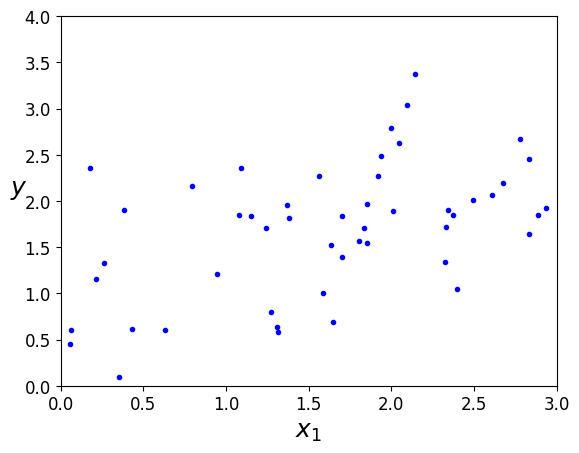

In [35]:
from sklearn.model_selection import train_test_split

m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 4])

## Exercise 1: Using Scikit-Learn, fit a polynomial of degree three using linear regression, and plot the predictions

(0.0, 3.0, 0.0, 4.0)

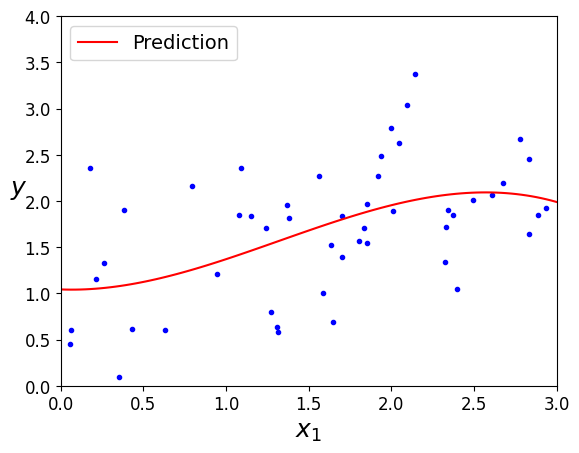

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
# print(poly_features.get_feature_names_out())
# print(X_poly[0])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.linspace(0, 3, 100).reshape(100, 1)
# print(X_new)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3, 0, 4])

## Exercise 2: Fit a polynomial of degree three using linear regression with Tikhonov regularization, and plot the predictions

Consider Ridge regularization parameter `alpha=1`.

(0.0, 3.0, 0.0, 4.0)

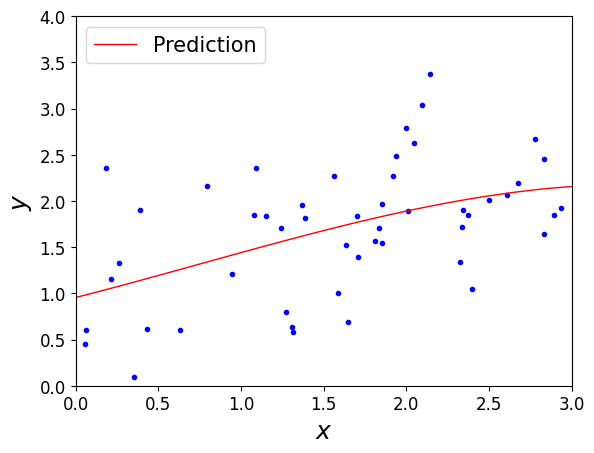

In [45]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

np.random.seed(42)

alpha = 1

pipe = Pipeline([("poly", PolynomialFeatures(degree=3)),
                 ("std_scalar", StandardScaler()),
                 ("lin_reg", Ridge(alpha=alpha))])

pipe.fit(X, y)
y_new = pipe.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=1, label="Prediction")
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0, 3, 0, 4])

